<span style="font-size: 25px;">**Cette étude s'appuie sur deux jeux de données issus de la plateforme Open Data de Paris :**

<span style="color: blue;">**Budget Participatif - Les opérations des projets lauréats jusqu’à leurs réalisations(Citoyenneté) :**</span> Ce dataset détaille la vie des projets financés par le budget participatif parisien, depuis leur conception jusqu'à leur réalisation, offrant une vision granulaire des dynamiques citoyennes et des impacts de ces projets.

<span style="color: blue;">**Dette de la Ville de Paris(administration et finance publique) :**</span> Ce dataset présente l'évolution de l'endettement de la ville, fournissant un contexte financier essentiel pour comprendre les contraintes budgétaires dans lesquelles s'inscrit le budget participatif.
En croisant ces deux sources, nous cherchons à analyser les liens potentiels entre l'évolution de la dette de la ville et la dynamique des projets participatifs, afin d'évaluer l'impact de ces derniers sur les finances publiques parisiennes et de mieux comprendre les enjeux liés à la participation citoyenne dans la gestion budgétaire d'une grande ville. »</span>

<span style="font-size: 14px;">**Data_Source :- https://opendata.paris.fr/explore/dataset/budget-participatif_operations-projets-gagnants-realisations/information/?disjunctive.thematique&disjunctive.type_financement_operation&disjunctive.arrondissement_operation&disjunctive.operation_q_pop&disjunctive.quartier_operation&disjunctive.avancement_operation&disjunctive.direction_pilote_projet**</span> 
<span style="font-size: 14px;">**https://opendata.paris.fr/explore/dataset/dette-propre/information/?disjunctive.nature&disjunctive.organisme_preteur_ou_chef_de_file&disjunctive.type_de_taux_d_interet&disjunctive.index&disjunctive.profil_d_amortissement&disjunctive.possibilite_de_remboursement&disjunctive.categorie_d_emprunt**</span> 

<span style="font-size: 20px;">**récupération et exploration des données(API)**

In [1]:
import requests
import pandas as pd
url="https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/budget-participatif_operations-projets-gagnants-realisations/records?limit=20&refine=type_financement_operation%3A%22179%22"
r=requests.get(url)
print (r.status_code) 
if r.status_code == 200:
    json_data=r.json()
    for key, value in json_data.items():
         print(key+ ':',value)
   
else:
    print("Failed to fetch data:",r.status_code)

200
total_count: 24
results: [{'identifiant_operation': 7436, 'titre_operation': 'Sécurisation rue la Boétie', 'titre_projet_gagnant': 'Protéger les piétons et réduire les nuisances sonores', 'edition': '2022', 'thematique': 'Prévention et sécurité', 'direction_pilote_operation': 'Direction de la Voirie et des Déplacements', 'type_financement_operation': '179', 'adresse_operation': 'Rue La Boétie', 'arrondissement_operation': '75008', 'longitude': 2.3119431, 'latitude': 48.87321605, 'operation_q_pop': None, 'quartier_operation': None, 'avancement_operation': 'PROCEDURES', 'debut_etudes_operation': '2022-10', 'lancement_procedure_operation': '2024-04', 'lancement_travaux_operation': '2024-10', 'livraison_prev_operation': '2025-03', 'ouverture_operation': None, 'identifiant_projet_gagnant': 10652, 'lien_projet_soumis': 'https://decider.paris.fr/bp/jsp/site/Portal.jsp?page=idee&campagne=H&idee=001774', 'lien_projet_gagnant': 'https://decider.paris.fr/bp/jsp/site/Portal.jsp?document_id=106

In [2]:
#load results data to a dataframe
Df_projets= pd.DataFrame(json_data["results"])
print(Df_projets.head(10))

   identifiant_operation                                    titre_operation  \
0                   7436                         Sécurisation rue la Boétie   
1                   2971           Un lieu pour les jeunes par les jeunes !   
2                   6353                     Végétaliser les pieds d'arbres   
3                   6891                           Couverture du TEP Dunois   
4                   3518                 Belle place à Vauvernagues/Leibniz   
5                   7503  Embellir les murs existants du périphérique av...   
6                   4389       Un local neuf pour l'AS Centre et les jeunes   
7                   4405             Montmartre accessible à tous - Phase 3   
8                   7525                Installer un pigeonnier dans le 19e   
9                   6943                        Basket 3*3 au TEP Serrurier   

                                titre_projet_gagnant edition  \
0  Protéger les piétons et réduire les nuisances ...    2022   
1 

In [3]:
# Display basic information about the DataFrame
Df_projets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   identifiant_operation          20 non-null     int64  
 1   titre_operation                20 non-null     object 
 2   titre_projet_gagnant           20 non-null     object 
 3   edition                        20 non-null     object 
 4   thematique                     20 non-null     object 
 5   direction_pilote_operation     20 non-null     object 
 6   type_financement_operation     20 non-null     object 
 7   adresse_operation              20 non-null     object 
 8   arrondissement_operation       20 non-null     object 
 9   longitude                      20 non-null     float64
 10  latitude                       20 non-null     float64
 11  operation_q_pop                13 non-null     object 
 12  quartier_operation             9 non-null      objec

In [4]:
# Display summary statistics
Df_projets.describe()

,identifiant_operation,longitude,latitude,identifiant_projet_gagnant,budget_global_projet_gagnant
count,20.00000,20.000000,20.000000,20.000000,2.000000e+01
mean,6099.50000,2.345030,48.873783,7499.450000,2.016700e+06
std,1657.20721,0.029682,0.017742,3065.254922,2.256096e+06
min,2844.00000,2.268910,48.832420,1834.000000,1.500000e+04
25%,4438.75000,2.332170,48.863930,6001.500000,2.712500e+05
50%,6893.50000,2.348500,48.874083,7553.000000,1.370000e+06
75%,7417.25000,2.359332,48.887755,10576.000000,2.625000e+06
max,7589.00000,2.397778,48.894600,10652.000000,6.700000e+06


In [5]:
# Check for missing values
missing_values = Df_projets.isnull().sum()
print(missing_values)

identifiant_operation             0
titre_operation                   0
titre_projet_gagnant              0
edition                           0
thematique                        0
direction_pilote_operation        0
type_financement_operation        0
adresse_operation                 0
arrondissement_operation          0
longitude                         0
latitude                          0
operation_q_pop                   7
quartier_operation               11
avancement_operation              0
debut_etudes_operation            1
lancement_procedure_operation    12
lancement_travaux_operation       8
livraison_prev_operation          1
ouverture_operation              12
identifiant_projet_gagnant        0
lien_projet_soumis                1
lien_projet_gagnant               0
direction_pilote_projet           0
budget_global_projet_gagnant      0
echelle_bp                        0
adresse_projet_gagnant            5
arrondissement_projet_gagnant     0
projet_q_pop                

In [6]:
# Optionally, fill or drop missing values
Df_projets = Df_projets.fillna("NULL")  # or use fillna() to fill missing values

In [7]:
Df_projets

,identifiant_operation,titre_operation,titre_projet_gagnant,edition,thematique,direction_pilote_operation,type_financement_operation,adresse_operation,arrondissement_operation,longitude,...,projet_q_pop,avancement_projet,debut_etudes_projet,lancement_procedure_projet,lancement_travaux_projet,livraison_prev_projet,ouverture_projet,derniere_mise_a_jour_donnees,geo_shape,geo_point_2d
0,7436,Sécurisation rue la Boétie,Protéger les piétons et réduire les nuisances ...,2022,Prévention et sécurité,Direction de la Voirie et des Déplacements,179,Rue La Boétie,75008,2.311943,...,Non,LIVRAISON,2022-10,2023-04,2023-05,2023-06,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.311943100333977, 'lat': 48.873216050..."
1,2971,Un lieu pour les jeunes par les jeunes !,Un lieu pour les jeunes par les jeunes !,2016,Education et jeunesse,Direction de la Jeunesse et des Sports,179,7 Rue de la Ville Neuve,75002,2.348500,...,Non,FIN,2017-03,2018-11,2019-04,2020-11,2021-12,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3485000001818768, 'lat': 48.86970000..."
2,6353,Végétaliser les pieds d'arbres,Végétaliser les pieds d'arbres,2019,Environnement,Direction des Espaces Verts et de l’Environnement,179,Place de l'hôtel de Ville,75004,2.350890,...,Oui,PROCEDURES,2020-01,2021-09,NULL,2026-10,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3508900003359625, 'lat': 48.85640999..."
3,6891,Couverture du TEP Dunois,Du sport pour toutes et tous dans les quartier...,2018,Sport,Direction de la Jeunesse et des Sports,179,"59, Rue Dunois",75013,2.367066,...,Oui,LIVRAISON,2019-01,2019-02,2019-07,2019-09,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.367066299799957, 'lat': 48.832419799..."
4,3518,Belle place à Vauvernagues/Leibniz,Belle place à Vauvenargues/Leibniz,2017,Cadre de vie,Direction de la Voirie et des Déplacements,179,Rue Vauvenargues,75018,2.332200,...,Oui,LIVRAISON,2019-10,2020-09,2023-12,2024-06,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3321999994865017, 'lat': 48.89460000..."
5,7503,Embellir les murs existants du périphérique av...,Une ville plus belle et plus propre,2022,Propreté,Direction des Affaires Culturelles,179,Place de l'hôtel de Ville,75004,2.351078,...,Non,TRAVAUX,2022-10,NULL,2023-11,2024-09,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3510782596312425, 'lat': 48.85675342..."
6,4389,Un local neuf pour l'AS Centre et les jeunes,Un local neuf pour l'AS Centre et les jeunes,2018,Sport,Direction de la Jeunesse et des Sports,179,7 rue de la Ville Neuve,75002,2.348500,...,Non,FIN,NULL,NULL,2019-04,2020-11,2021-09,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3485000001818768, 'lat': 48.86970000..."
7,4405,Montmartre accessible à tous - Phase 3,Montmartre accessible à tous - Phase 3,2018,Mobilités,Direction de la Voirie et des Déplacements,179,Rue du Chevalier de la Barre,75018,2.344400,...,Non,FIN,2019-08,2019-11,2021-10,2023-08,2023-12,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.344399999679314, 'lat': 48.887300000..."
8,7525,Installer un pigeonnier dans le 19e,Rafraichir la ville et promouvoir la biodiversité,2022,Environnement,Direction des Espaces Verts et de l’Environnement,179,Avenue Jean Jaurès,75019,2.387840,...,Non,LIVRAISON,2022-10,2023-08,2024-11,2024-06,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.3878400294068927, 'lat': 48.88740710..."
9,6943,Basket 3*3 au TEP Serrurier,Du sport pour toutes et tous dans les quartier...,2018,Sport,Direction de la Jeunesse et des Sports,179,"24, boulevard Sérurier",75019,2.382600,...,Oui,LIVRAISON,2019-01,2019-02,2019-07,2019-09,NULL,NULL,"{'type': 'Feature', 'geometry': {'coordinates'...","{'lon': 2.382599999608464, 'lat': 48.882599999..."


In [8]:
# Drop a specific column
Df_projets = Df_projets.drop(columns=["derniere_mise_a_jour_donnees"])
print(Df_projets.head())

   identifiant_operation                           titre_operation  \
0                   7436                Sécurisation rue la Boétie   
1                   2971  Un lieu pour les jeunes par les jeunes !   
2                   6353            Végétaliser les pieds d'arbres   
3                   6891                  Couverture du TEP Dunois   
4                   3518        Belle place à Vauvernagues/Leibniz   

                                titre_projet_gagnant edition  \
0  Protéger les piétons et réduire les nuisances ...    2022   
1           Un lieu pour les jeunes par les jeunes !    2016   
2                     Végétaliser les pieds d'arbres    2019   
3  Du sport pour toutes et tous dans les quartier...    2018   
4                 Belle place à Vauvenargues/Leibniz    2017   

               thematique                         direction_pilote_operation  \
0  Prévention et sécurité         Direction de la Voirie et des Déplacements   
1   Education et jeunesse         

In [9]:
url1="https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/dette-propre/records?limit=20"
r1=requests.get(url1)
print (r1.status_code) 
if r1.status_code == 200:
    json_data1=r1.json()
    for key, value in json_data1.items():
         print(key+ ':',value)
   
else:
    print("Failed to fetch data:",r1.status_code)

200
total_count: 697
results: [{'annee_de_publication': '2008', 'nature': '1641 - Emprunts établissements crédit', 'organisme_preteur_ou_chef_de_file': 'DEXIA CREDIT LOCAL', 'date_d_emission_ou_date_de_mobilisation': '2003-12-22', 'date_de_derniere_echeance': '2013-12-22', 'capital_initial': 35000000.0, 'capital_restant_du_au_31_12_2016': 35000000.0, 'type_de_taux_d_interet': 'Indexé', 'index': 'TAG06M', 'taux_initial_niveau_de_taux': 0.15810000000000002, 'taux_initial_taux_actuariel': 1.9644, 'profil_d_amortissement': 'Emprunt in fine', 'possibilite_de_remboursement': 'oui', 'categorie_d_emprunt': 'A-1'}, {'annee_de_publication': '2012', 'nature': '16311 - Emissions obligataires', 'organisme_preteur_ou_chef_de_file': 'HSBC-Natixis', 'date_d_emission_ou_date_de_mobilisation': '2007-12-04', 'date_de_derniere_echeance': '2020-12-04', 'capital_initial': 160000000.0, 'capital_restant_du_au_31_12_2016': 160000000.0, 'type_de_taux_d_interet': 'Fixe', 'index': 'TAUX FIXE', 'taux_initial_nivea

In [10]:
#load new results data to a dataframe
Df_dettePropre= pd.DataFrame(json_data1["results"])
print(Df_dettePropre.head(10))

  annee_de_publication                                 nature  \
0                 2008  1641 - Emprunts établissements crédit   
1                 2012         16311 - Emissions obligataires   
2                 2012         16311 - Emissions obligataires   
3                 2014         16311 - Emissions obligataires   
4                 2015  1641 - Emprunts établissements crédit   
5                 2017  1641 - Emprunts établissements crédit   
6                 2018         16311 - Emissions obligataires   
7                 2010         16311 - Emissions obligataires   
8                 2011  1641 - Emprunts établissements crédit   
9                 2014         16311 - Emissions obligataires   

  organisme_preteur_ou_chef_de_file date_d_emission_ou_date_de_mobilisation  \
0                DEXIA CREDIT LOCAL                              2003-12-22   
1                      HSBC-Natixis                              2007-12-04   
2                     Deutsche Bank            

In [11]:
# Check for missing values
missing_values_0 = Df_dettePropre.isnull().sum()
print(missing_values_0)

annee_de_publication                       0
nature                                     0
organisme_preteur_ou_chef_de_file          0
date_d_emission_ou_date_de_mobilisation    3
date_de_derniere_echeance                  0
capital_initial                            0
capital_restant_du_au_31_12_2016           0
type_de_taux_d_interet                     3
index                                      0
taux_initial_niveau_de_taux                0
taux_initial_taux_actuariel                0
profil_d_amortissement                     0
possibilite_de_remboursement               0
categorie_d_emprunt                        0
dtype: int64


<span style="font-size: 13px;">**No need to drop rows /impute missing values for each of capital initial column in the DettePropre and budget_global_projet_gagnant column in the BudgetParticipatif Dataset, since No missing values were detected .**</span> 

<span style="font-size: 20px;">**Étude de la corrélation entre le niveau d'endettement et le budget alloué au financement de projets**

In [12]:
#check the datatype of the years to avoid the dataype mismatch when merging them in one dataframe
Df_projets["edition"].dtype

dtype('O')

In [13]:
Df_dettePropre["annee_de_publication"].dtype

dtype('O')

<span style="font-size: 13px;">**Creation de new Dataframe pour faire l'etude**</span> 

In [14]:
# Function to calculate annual debt level
def calculate_annual_debt(data, year_col, amount_col):
  annual_debt = data.groupby(year_col)[amount_col].sum()
  return annual_debt.reset_index()

# Function to calculate annual project budget
def calculate_annual_project_budget(data, year_col, budget_col):
  annual_budget = data.groupby(year_col)[budget_col].sum()
  return annual_budget.reset_index()

# Extract year from relevant columns 
Df_projets["Year"] = pd.to_datetime(Df_projets["edition"]).dt.year
Df_dettePropre["Year"] = pd.to_datetime(Df_dettePropre["annee_de_publication"]).dt.year

# Convert "Year" column to integer
Df_projets["Year"] = Df_projets["Year"].astype(int)
Df_dettePropre["Year"] = Df_dettePropre["Year"].astype(int)

# Calculate annual debt
annual_debt_df = calculate_annual_debt(Df_dettePropre.copy(), "Year", "capital_initial")

# Calculate annual project budget
annual_budget_df = calculate_annual_project_budget(Df_projets.copy(), "Year", "budget_global_projet_gagnant")

# Combine data into new DataFrame
new_df = pd.merge(annual_debt_df, annual_budget_df, on="Year")

# Explore and analyze new_df
print(new_df.head())

   Year  capital_initial  budget_global_projet_gagnant
0  2015     1.150263e+08                       1500000
1  2017     5.000000e+07                         15000
2  2018     9.650000e+07                      14759000


In [15]:
#Correlation_analysis
correlation = new_df["capital_initial"].corr(new_df["budget_global_projet_gagnant"])
print(f"Correlation between City Debt Level and Budget for Project Funding: {correlation}")

Correlation between City Debt Level and Budget for Project Funding: 0.3288056782005793


<span style="color:red;">La corrélation de 0,3288 entre l'endettement des villes et le budget des projets indique une association positive, mais ne prouve pas une relation de cause à effet.</span>

<span style="font-size: 13px;">**NOTE**: j'ai émis des doutes sur la fiabilité de cette corrélation en raison d'une limitation inhérente à l'API : le nombre de records renvoyés par défaut était **restreint**. Cette limitation pouvait potentiellement introduire **un biais dans l'analyse**.
Afin de surmonter cette limitation, j'ai opté pour une stratégie de récupération de données par lots **(Batch Fetching)**. Cette approche consiste à effectuer des requêtes multiples à l'API en spécifiant des paramètres de pagination pour obtenir des ensembles de données plus importants à chaque requête.
Malgré son efficacité, la récupération par lots s'est avérée extrêmement **chronophage**, notamment lorsque le volume total de données à télécharger était considérable.
Pour accélérer le processus et éviter les biais potentiels liés à l'API, j'ai décidé de me tourner vers une méthode plus directe : **l'extraction des données à partir d'un fichier Excel existant**. En utilisant la bibliothèque Pandas, j'ai pu charger les données du fichier Excel dans un DataFrame, ce qui a permis de les manipuler et d'analyser la corrélation de manière plus efficace.</span> 

In [19]:
#import data as xlsx
# Install openpyxl if not already installed
!pip install openpyxl

# Read the Excel file
Budget_Participatif = pd.read_excel("budget-participatif_operations-projets-gagnants-realisations (1).xlsx")

Budget_Participatif.head(100)

,Identifiant de l'opération,Titre de l'opération,Titre du projet lauréat,Edition,Thématique,Direction pilote de l'opération,Type de financement de l'opération,Adresse de l'opération,Arrondissement de l'opération,Longitude,...,Projet en Quartier populaire,Avancement du projet,Date de début des études du projet,Date de lancement des procédures du projet,Date de lancement des travaux du projet,Date prévisonnelle de livraison du projet,Date d'ouverture du projet au public,Dernière mise à jour des données du projet,geo_shape,geo_point_2d
0,2736,Un boulodrome dans le 17e,Un boulodrome dans le 17e,2015,Sport,Direction des Espaces Verts et de l’Environnement,Régie,"25, Avenue de la Porte de Villiers",75017,2.28496,...,Non,FIN,2016-06,2016-12,2018-04,2019-03,2019-03,NaN,"{""coordinates"":[2.2849600005284905,48.88505000...","48.88505000035704, 2.2849600005284905"
1,2780,Rénovation d'une aire de jeux au parc Monceau,Rénovation d'une aire de jeux au parc Monceau,2015,Education et jeunesse,Direction des Espaces Verts et de l’Environnement,Régie,35 Boulevard de Courcelles,75008,2.31120,...,Non,FIN,2016-02,2016-09,2017-01,2017-04,2017-04,NaN,"{""coordinates"":[2.311199999319923,48.880499999...","48.880499999963, 2.311199999319923"
2,2795,Création d'une bagagerie dans le quartier Vill...,Bagagerie dans le quartier Villette-Pont de Fl...,2015,Solidarités,NaN,NaN,"11, passage de Flandre",75019,2.37380,...,Oui,FIN,2017-01,2017-03,2018-06,2018-12,2018-12,NaN,"{""coordinates"":[2.3737999993162817,48.88700000...","48.88700000042206, 2.3737999993162817"
3,2855,Piétonnisation de la rue Vavin,Piétonnisation de la rue Vavin,2015,Environnement,Direction de la Voirie et des Déplacements,NaN,"1, Rue Vavin",75006,2.33228,...,Non,FIN,2016-02,2016-11,2017-02,2017-04,2017-04,NaN,"{""coordinates"":[2.332280000123829,48.844719999...","48.84471999976459, 2.332280000123829"
4,2862,Poser un tapis phonique et une végétalisation ...,Poser un tapis phonique et une végétalisation ...,2015,Cadre de vie,Direction de la Voirie et des Déplacements,NaN,Rue de Bagnolet,75020,2.40160,...,Non,FIN,2016-03,2016-07,2018-06,2018-08,2018-08,NaN,"{""coordinates"":[2.4016000005352893,48.86049999...","48.86049999964601, 2.4016000005352893"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4568,Activités sportives urbaines dans le 14e / Esp...,Activités sportives urbaines dans le 14e,2018,Sport,Direction des Espaces Verts et de l’Environnement,Régie,"2, Place Ferdinand Brunot",75014,2.32684,...,Non,FIN,2018-10,2019-01,2019-01,2020-05,2020-09,NaN,"{""coordinates"":[2.3268399994849442,48.83299000...","48.83299000020346, 2.3268399994849442"
96,4601,Gymnase Ortolan,Rénover et rendre accessibles les équipements ...,2018,Sport,Direction de la Jeunesse et des Sports,NaN,18 rue Ortolan,75005,2.34980,...,Non,FIN,2018-11,2019-01,2019-12,2019-12,2020-03,NaN,"{""coordinates"":[2.3498000002030475,48.84320000...","48.843200000241595, 2.3498000002030475"
97,4621,CS Butte-aux-Cailles,Continuer l'amélioration de l'accessibilité po...,2017,Cadre de vie,Direction de la Jeunesse et des Sports,NaN,5 place Paul Verlaine,75013,2.35250,...,Non,FIN,2018-01,2018-02,2018-04,2018-06,2024-02,NaN,"{""coordinates"":[2.3525000001872804,48.82740000...","48.827400000074974, 2.3525000001872804"
98,4625,Pétillante Totem,Des fontaines à boire dans tout Paris,2015,Cadre de vie,Direction de la Propreté et de l’Eau,NaN,rue Léopold Bellan,75002,2.34550,...,Non,FIN,2016-01,2016-01,2016-10,2017-03,2020-07,NaN,"{""coordinates"":[2.345500000538994,48.866600000...","48.86660000040372, 2.345500000538994"


In [20]:
Dette_Propre = pd.read_excel("dette-propre.xlsx")

Dette_Propre.head(100)

,Année de publication,Nature,Organisme prêteur ou chef de file,Date d'émission ou date demobilisation,Date de dernière échéance,Capital initial,Capital restant dû au 31/12/2016,Type detaux d'intérêt,Index,Taux Initial - Niveau de taux,Taux Initial - Taux actuariel,Profil d'amortissement,Possibilité de remboursement,Catégorie d’emprunt
0,2008,16441 - Emprunts option tirage tréso,Caisse Nat. C.E.,2004-12-17,2010-12-17,75000000.0,7.500000e+07,Fixe,TAUX FIXE,0.0000,0.0000,Emprunt in fine,oui,A-1
1,2008,16311 - Emissions obligataires,HSBC,2005-11-09,2018-11-09,50651230.1,5.065123e+07,Indexé,EURIBOR03M,0.0210,1.3865,Emprunt in fine,oui,A-1
2,2009,1641 - Emprunts établissements crédit,BNP Paribas,2002-12-27,2017-12-27,110000000.0,1.100000e+08,Indexé,T4M,0.0013,1.6055,Emprunt in fine,oui,A-1
3,2011,16311 - Emissions obligataires,HSBC-Natixis,2006-05-26,2016-05-26,200000000.0,2.000000e+08,Fixe,TAUX FIXE,4.1250,4.1252,Emprunt in fine,oui,A-1
4,2011,1641 - Emprunts établissements crédit,BEI,2011-12-19,2024-12-19,100000000.0,1.000000e+08,Fixe,TAUX FIXE,3.7810,3.7811,Emprunt in fine,oui,A-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018,1641 - Emprunts établissements crédit,CDC,NaN,2042-03-10,30000000.0,2.823956e+07,NaN,TAUX FIXE,1.4800,1.4800,Échéance constante,oui,A-1
96,2008,16311 - Emissions obligataires,Natixis,2006-11-28,2019-11-28,100000000.0,1.000000e+08,Indexé,EURIBOR03M,-0.0080,1.1258,Emprunt in fine,oui,A-1
97,2012,1641 - Emprunts établissements crédit,BEI,2010-07-21,2023-07-21,100000000.0,1.000000e+08,Fixe,TAUX FIXE,3.4510,3.4512,Emprunt in fine,oui,A-1
98,2014,1641 - Emprunts établissements crédit,BEI,2014-07-31,2023-07-31,130000000.0,1.300000e+08,Fixe,TAUX FIXE,1.4540,1.4547,Emprunt in fine,non,A-1


In [66]:
Budget_Participatif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Identifiant de l'opération                       4701 non-null   int64  
 1   Titre de l'opération                             4696 non-null   object 
 2   Titre du projet lauréat                          4672 non-null   object 
 3   Edition                                          4701 non-null   int64  
 4   Thématique                                       4701 non-null   object 
 5   Direction pilote de l'opération                  4329 non-null   object 
 6   Type de financement de l'opération               1804 non-null   object 
 7   Adresse de l'opération                           4701 non-null   object 
 8   Arrondissement de l'opération                    4700 non-null   object 
 9   Longitude                     

In [67]:
Dette_Propre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Année de publication                    697 non-null    int64  
 1   Nature                                  697 non-null    object 
 2   Organisme prêteur ou chef de file       697 non-null    object 
 3   Date d'émission ou date demobilisation  610 non-null    object 
 4   Date de dernière échéance               697 non-null    object 
 5   Capital initial                         697 non-null    float64
 6   Capital restant dû au 31/12/2016        697 non-null    float64
 7   Type detaux d'intérêt                   610 non-null    object 
 8   Index                                   697 non-null    object 
 9   Taux Initial - Niveau de taux           697 non-null    float64
 10  Taux Initial - Taux actuariel           697 non-null    float6

In [21]:
# Check for missing values
missingvalues = Budget_Participatif.isnull().sum()
print(missingvalues)

Identifiant de l'opération                            0
Titre de l'opération                                  5
Titre du projet lauréat                              29
Edition                                               0
Thématique                                            0
Direction pilote de l'opération                     372
Type de financement de l'opération                 2897
Adresse de l'opération                                0
Arrondissement de l'opération                         1
Longitude                                             0
Latitude                                              0
Opération en Quartier Populaire                     627
Quartier de l'opération                            1206
Avancement de l'opération                             0
Date de début des études de l'opération             178
Date de lancement des procédures de l'opération    2036
Date de lancement des travaux de l'opération       1706
Date prévisonnelle de livraison de l'opération  

In [22]:
# Check for missing values
missingvalues1 = Dette_Propre.isnull().sum()
print(missingvalues1)

Année de publication                       0
Nature                                     0
Organisme prêteur ou chef de file          0
Date d'émission ou date demobilisation    87
Date de dernière échéance                  0
Capital initial                            0
Capital restant dû au 31/12/2016           0
Type detaux d'intérêt                     87
Index                                      0
Taux Initial - Niveau de taux              0
Taux Initial - Taux actuariel              0
Profil d'amortissement                     0
Possibilité de remboursement               0
Catégorie d’emprunt                        0
dtype: int64


<span style="font-size: 15px;">**Refaire les memes etapes pour Creer new Dataframe pour afin d'observer la correlation**</span> 

In [26]:
# Extract year from relevant columns (assuming "Edition" and "Année de publication" are already in integer format)
Budget_Participatif["Year"] = Budget_Participatif["Edition"]
Dette_Propre["Year"] = Dette_Propre["Année de publication"]

# Filter data based on common years (if necessary)
min_year = min(Budget_Participatif["Year"].min(), Dette_Propre["Year"].min())
max_year = max(Budget_Participatif["Year"].max(), Dette_Propre["Year"].max())

Budget_Participatif = Budget_Participatif[(Budget_Participatif["Year"] >= min_year) & (Budget_Participatif["Year"] <= max_year)]
Dette_Propre = Dette_Propre[(Dette_Propre["Year"] >= min_year) & (Dette_Propre["Year"] <= max_year)]

# Calculate annual debt
annual_debt_df = calculate_annual_debt(Dette_Propre.copy(), "Year", "Capital initial")

# Calculate annual project budget
annual_budget_df = calculate_annual_project_budget(Budget_Participatif.copy(), "Year", "Budget global du projet lauréat")

# Combine data into new DataFrame
new_df = pd.merge(annual_debt_df, annual_budget_df, on="Year")

# Explore and analyze new_df
print(new_df.head())

   Year  Capital initial  Budget global du projet lauréat
0  2014     4.062139e+09                        753600000
1  2015     4.646021e+09                       1180105000
2  2016     5.193125e+09                       1874707407
3  2017     5.785625e+09                       1095851100
4  2018     5.901314e+09                        663421900


In [27]:
#Correlation_analysis
correlation = new_df["Capital initial"].corr(new_df["Budget global du projet lauréat"])
print(f"Correlation between City Debt Level and Budget for Project Funding: {correlation}")

Correlation between City Debt Level and Budget for Project Funding: 0.02791515735608592


<span style="font-size: 15px;">**La corrélation** entre **le niveau d'endettement des villes** et **le budget alloué au financement de projets** est désormais de **0,0279**.

Cette valeur indique **une corrélation très faible** entre ces deux variables. Cela signifie qu'il y a peu ou pas de relation observable entre le niveau d'endettement d'une ville et le montant de son budget pour les projets.

En conclusion, il semble que l'analyse initiale basée sur les données API était **erronée**. La corrélation réelle est bien inférieure à ce qui avait été précédemment rapporté.
En résumé, la faible corrélation observée suggère que le niveau d'endettement d'une ville n'est pas un facteur déterminant majeur dans l'allocation de budgets pour les projets,Il est probable que d'autres facteurs, tels que la taille de la ville, la population, l'activité économique ou les politiques locales, aient une influence plus significative sur le budget alloué aux projets.</span>

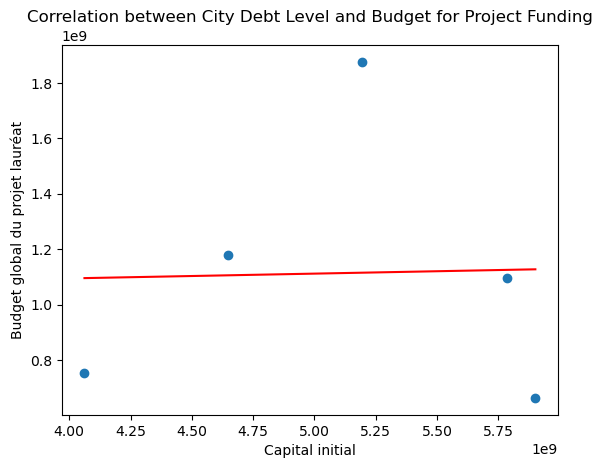

In [29]:
import statsmodels.api as sm #for linear regression modeling



# Fit a linear regression model
X = sm.add_constant(new_df["Capital initial"])  # Add a constant term for the intercept
y = new_df["Budget global du projet lauréat"]
model = sm.OLS(y, X).fit()

# Create a scatter plot
plt.scatter(new_df["Capital initial"], new_df["Budget global du projet lauréat"])

# Plot the regression line
plt.plot(new_df["Capital initial"], model.fittedvalues, color='red')

plt.xlabel("Capital initial")
plt.ylabel("Budget global du projet lauréat")
plt.title("Correlation between City Debt Level and Budget for Project Funding")
plt.show()

<span style="font-size: 14px;">**Le graphique confirme la faible corrélation observée précédemment. Bien qu'il existe une légère tendance positive, les variations individuelles entre les villes sont importantes, ce qui rend difficile d'établir une relation de cause à effet claire entre le niveau d'endettement et le budget alloué aux projets.En conclusion, bien que Budget Participatif et Dette Propre ne soient pas directement liés, ils sont interconnectés par des facteurs tels que les contraintes de financement, la faisabilité des projets et la perception publique. Comprendre ces relations est crucial pour une gestion efficace des finances publiques et une gouvernance démocratique.**</span> 



<span style="color: blue; font-size: 20px;">**Étude de la corrélation entre le niveau d'endettement et l'avancement du projet.**<span/>

In [38]:
# Extract year from relevant columns (assuming "Edition" and "Année de publication" are already in integer format)
Budget_Participatif["Year"] = Budget_Participatif["Edition"]
Dette_Propre["Year"] = Dette_Propre["Année de publication"]

# Filter data based on common years
min_year = min(Budget_Participatif["Year"].min(), Dette_Propre["Year"].min())
max_year = max(Budget_Participatif["Year"].max(), Dette_Propre["Year"].max())

Budget_Participatif = Budget_Participatif[(Budget_Participatif["Year"] >= min_year) & (Budget_Participatif["Year"] <= max_year)]
Dette_Propre = Dette_Propre[(Dette_Propre["Year"] >= min_year) & (Dette_Propre["Year"] <= max_year)]

# Calculate annual debt
annual_debt_df = calculate_annual_debt(Dette_Propre.copy(), "Year", "Capital initial")

# Calculate annual project budget and advancement percentages
annual_project_df = Budget_Participatif.groupby("Year").agg(
    FIN=("Avancement du projet", lambda x: (x == "FIN").sum() / len(x) * 100),
    ETUDE=("Avancement du projet", lambda x: (x == "ETUDE").sum() / len(x) * 100),
    ABANDONNÉ=("Avancement du projet", lambda x: (x == "ABANDONNÉ").sum() / len(x) * 100),
    LIVRAISON=("Avancement du projet", lambda x: (x == "LIVRAISON").sum() / len(x) * 100),
    TRAVAUX=("Avancement du projet", lambda x: (x == "TRAVAUX").sum() / len(x) * 100),
    PROCEDURES=("Avancement du projet", lambda x: (x == "PROCEDURES").sum() / len(x) * 100),
    nondémarré=("Avancement du projet", lambda x: (x == "(non démarré)").sum() / len(x) * 100),
)

# Combine data into new DataFrame
new_df = pd.merge(annual_debt_df, annual_project_df, on="Year")

# Explore and analyze new_df
print(new_df.head())


   Year  Capital initial         FIN  ETUDE  ABANDONNÉ  LIVRAISON   TRAVAUX  \
0  2014     4.062139e+09  100.000000    0.0   0.000000   0.000000  0.000000   
1  2015     4.646021e+09   90.295359    0.0   1.969058   7.172996  0.421941   
2  2016     5.193125e+09   67.381174    0.0   2.050326  28.611370  0.652377   
3  2017     5.785625e+09   56.910569    0.0   1.300813  36.910569  1.951220   
4  2018     5.901314e+09   57.083333    0.0   0.416667  35.208333  1.458333   

   PROCEDURES  nondémarré  
0    0.000000    0.000000  
1    0.140647    0.000000  
2    0.372787    0.372787  
3    1.138211    0.325203  
4    2.500000    1.250000  


In [40]:
# Correlation analysis
correlation_fin = new_df["Capital initial"].corr(new_df["FIN"])
correlation_etude = new_df["Capital initial"].corr(new_df["ETUDE"])
correlation_abandonné = new_df["Capital initial"].corr(new_df["ABANDONNÉ"])
correlation_livraison = new_df["Capital initial"].corr(new_df["LIVRAISON"])
correlation_travaux = new_df["Capital initial"].corr(new_df["TRAVAUX"])
correlation_procedures = new_df["Capital initial"].corr(new_df["PROCEDURES"])
correlation_nondémarré = new_df["Capital initial"].corr(new_df["nondémarré"])

print(f"Correlation between Capital initial and FIN: {correlation_fin}")
print(f"Correlation between Capital initial and ETUDE: {correlation_etude}")
print(f"Correlation between Capital initial and ABANDONNÉ: {correlation_abandonné}")
print(f"Correlation between Capital initial and LIVRAISON: {correlation_livraison}")
print(f"Correlation between Capital initial and TRAVAUX: {correlation_travaux}")
print(f"Correlation between Capital initial and PROCEDURES: {correlation_procedures}")
print(f"Correlation between Capital initial and nondémarré: {correlation_nondémarré}")


Correlation between Capital initial and FIN: -0.9840182920327816
Correlation between Capital initial and ETUDE: nan
Correlation between Capital initial and ABANDONNÉ: 0.1482710961219081
Correlation between Capital initial and LIVRAISON: 0.973479741141707
Correlation between Capital initial and TRAVAUX: 0.9339355833611364
Correlation between Capital initial and PROCEDURES: 0.8384009910452345
Correlation between Capital initial and nondémarré: 0.7718656908745235


<span style="font-size: 14px;">-**Corrélation entre Capital initial et FIN (-0.984)**:
Une corrélation négative très forte.
Cela signifie que plus le capital initial est élevé, moins le projet a de chances d'être terminé (FIN).
Une dette initiale importante pourrait être un frein à la finalisation des projets.

-**Corrélation entre Capital initial et ETUDE (nan)**:
Une valeur "nan" indique qu'il n'y a pas suffisamment de données pour calculer une corrélation entre ces deux variables. Il pourrait y avoir peu ou pas de projets dans la catégorie "ETUDE".

-**Corrélation entre Capital initial et ABANDONNÉ (0.148)**:
Une corrélation faiblement positive.
Cela suggère une légère tendance : les projets avec un capital initial plus élevé ont un peu plus de chances d'être abandonnés. Cependant, cette relation est très faible.

-**Corrélations entre Capital initial et LIVRAISON, TRAVAUX, PROCEDURES, nondémarré:**
Des corrélations positives fortes à très fortes.
Cela signifie que plus le capital initial est élevé, plus le projet a de chances d'atteindre ces étapes (LIVRAISON, TRAVAUX, PROCEDURES) ou de ne pas démarrer du tout (nondémarré).
Ces résultats semblent contradictoires avec la corrélation négative avec "FIN". Cela pourrait indiquer que les projets avec un capital initial élevé sont plus susceptibles de démarrer et d'avancer dans les premières étapes, mais qu'ils ont ensuite plus de difficultés à être finalisés

<span style="color: blue;">→ L'endettement initial semble avoir un impact complexe sur le cycle de vie des projets. Il favorise le démarrage et l'avancement initial des projets, mais il pourrait freiner leur finalisation.
En résumé, ces résultats suggèrent que l'endettement initial joue un rôle ambivalent dans le cycle de vie des projets. Il peut être à la fois un moteur et un frein, selon l'étape du projet considérée.</span></span>



<span style="color: blue; font-size: 20px;">**Visualisation de la corrélation entre le niveau dendettement et lavancement du projet.**<span/>

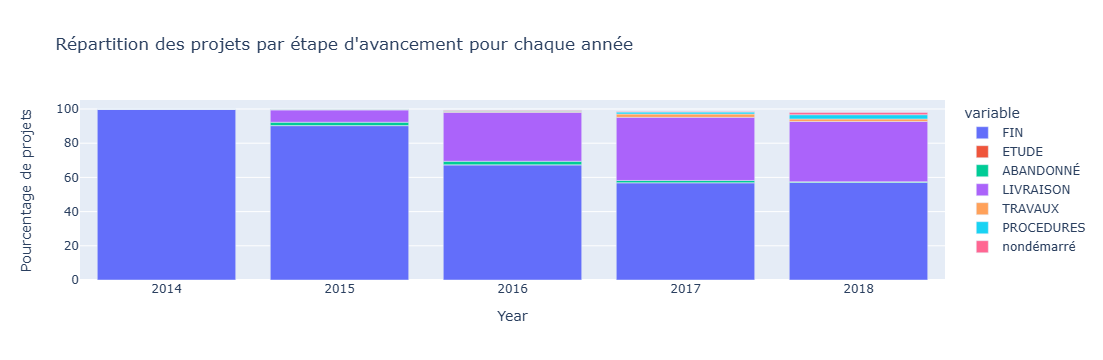

In [45]:
import plotly.express as px #for interactive visualizations

# Supposons que votre DataFrame 'new_df' contient les colonnes 'Year', 'FIN', 'ETUDE', 'ABANDONNÉ', etc.

fig = px.bar(new_df, x='Year', y=['FIN', 'ETUDE', 'ABANDONNÉ', 'LIVRAISON', 'TRAVAUX', 'PROCEDURES', 'nondémarré'],
            title="Répartition des projets par étape d'avancement pour chaque année",  # Notez les guillemets doubles
            labels={'value':'Pourcentage de projets'})
fig.show()

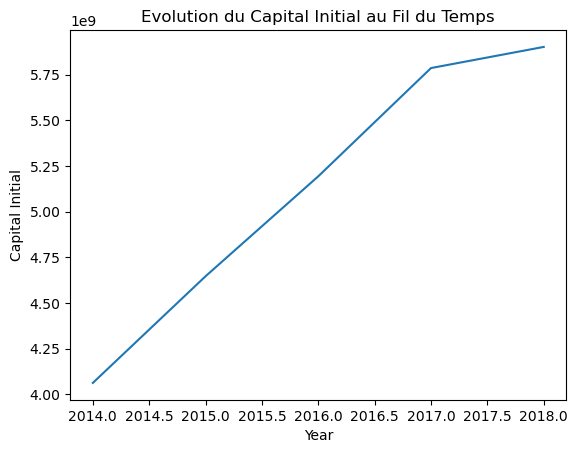

In [48]:
# Plot the line chart
plt.plot(new_df["Year"], new_df["Capital initial"])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Capital Initial")
plt.title("Evolution du Capital Initial au Fil du Temps")

# Show the plot
plt.show()

<span style="font-size: 20px;">**Corrélation entre l'endettement et l'avancement des projets**

**Année 2014**: Le niveau d'endettement le plus bas a coïncidé avec un taux de finalisation de projets (FIN) à 100%. Cela suggère que, dans un contexte de faible endettement, les projets ont une meilleure probabilité d'être achevés.

**Années 2015 à 2017**: L'augmentation rapide de l'endettement a été associée à une baisse du pourcentage de projets finalisés (FIN). Parallèlement, nous avons observé une hausse des projets en phase de "Livraison", ce qui pourrait indiquer que l'endettement a ralenti l'avancement des projets.

**Année 2018**: La stagnation de l'endettement a permis à un petit nombre de projets supplémentaires d'atteindre la phase "FIN", ce qui suggère que la réduction de l'endettement peut favoriser la finalisation des projets.</span>



<span style="color: blue; font-size: 20px;">**Visualisation Et etude de la corrélation entre Projet en Quartier populaire et l'avancement du projet.**</span>

In [144]:
# Importation des librairies et filtrage des données

<span style="font-size: 20px;">Une table de contingence permet de visualiser la distribution des effectifs en fonction de deux variables catégorielles. Dans ce cas, elle croise les projets situés en quartiers populaires ("Oui" / "Non") avec leur état d'avancement ("FIN", "procédures", etc.).</span>

In [64]:
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.cm as cm
# Filter data for "projet en quartier populaire" and "avancement du projet" columns
quartier_projet_df =Budget_Participatif[["Projet en Quartier populaire", "Avancement du projet"]]

# Create a contingency table
contingency_table = pd.crosstab(quartier_projet_df["Projet en Quartier populaire"], quartier_projet_df["Avancement du projet"])

# Calculate Cramer's V
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
phi = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
cramer_v = np.min([np.sqrt(phi), 1])

print("Cramer's V coefficient between 'Projet en Quartier populaire' and 'Avancement du projet':", cramer_v)



Cramer's V coefficient between 'Projet en Quartier populaire' and 'Avancement du projet': 0.3382203598507274


<span style="font-size: 14px;"> **Coefficient de Cramer V : 0.3382**

Ce coefficient de Cramer V, égal à 0.3382, indique **une corrélation moyenne** entre les variables **"Projet en Quartier populaire"** et **"Avancement du projet"**. Cela suggère qu'il existe une relation modérée entre le fait qu'un projet soit situé dans un quartier populaire et son avancement.



=> Les projets situés dans des quartiers populaires ont tendance à présenter un avancement légèrement différent par rapport aux projets dans d'autres quartiers. Cependant, cette relation n'est pas très forte.
=> D'autres facteurs pourraient également influencer l'avancement des projets, tels que le type de projet, le budget alloué, ou les spécificités du quartier lui-même.<span/>

<Figure size 800x600 with 0 Axes>

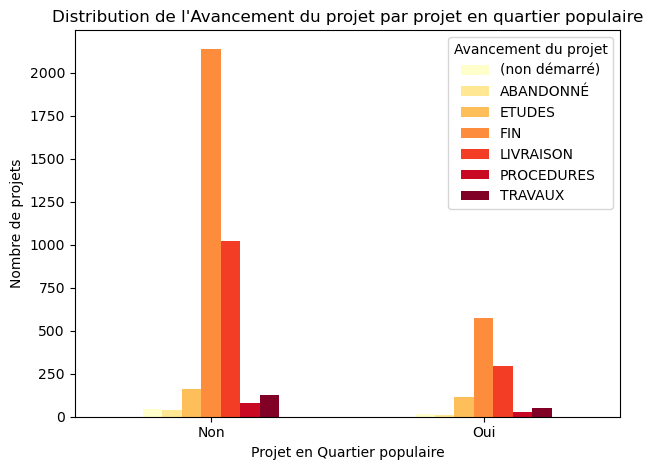

In [65]:
# Optional: Visualization using bar chart (consider using seaborn for more customization)
plt.figure(figsize=(8, 6))
contingency_table.plot(kind="bar", stacked=False, colormap=cm.YlOrRd)
plt.xlabel("Projet en Quartier populaire")
plt.ylabel("Nombre de projets")
plt.title("Distribution de l'Avancement du projet par projet en quartier populaire")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()  # Display the bar chart

<span style="font-size: 14px;">**Observations clés:**

**Projets Abandonnés et non démarrés:** Les projets dans les quartiers non populaires un taux légèrement plus élevé d'abandon et de projets non démarrés.

**Études et procédures:** Les étapes d'études et de procédures ont un taux plus élevé dans les quartiers non populaires.

**Réalisation:** Les projets dans les quartiers populaires ont un taux inférieur de projets achevés (FIN) et en cours de livraison (LIVRAISON).<span/>



<span style="color: blue; font-size: 20px;">**he ANOVA test to analyze the relationship between "Thématique" and Budget global du projet lauréat**</span>

In [154]:
# Read the Excel file
Budget_Participatifv = pd.read_excel("budget-participatif_operations-projets-gagnants-realisations (2).xlsx")

Budget_Participatifv.head(100)

,Identifiant de l'opération,Titre de l'opération,Titre du projet lauréat,Edition,Thématique,Direction pilote de l'opération,Type de financement de l'opération,Adresse de l'opération,Arrondissement de l'opération,Longitude,...,Projet en Quartier populaire,Avancement du projet,Date de début des études du projet,Date de lancement des procédures du projet,Date de lancement des travaux du projet,Date prévisonnelle de livraison du projet,Date d'ouverture du projet au public,Dernière mise à jour des données du projet,geo_shape,geo_point_2d
0,2736,Un boulodrome dans le 17e,Un boulodrome dans le 17e,2015,Sport,Direction des Espaces Verts et de l’Environnement,Régie,"25, Avenue de la Porte de Villiers",75017,2.28496,...,Non,FIN,2016-06,2016-12,2018-04,2019-03,2019-03,NaN,"{""coordinates"":[2.2849600005284905,48.88505000...","48.88505000035704, 2.2849600005284905"
1,2780,Rénovation d'une aire de jeux au parc Monceau,Rénovation d'une aire de jeux au parc Monceau,2015,Education et jeunesse,Direction des Espaces Verts et de l’Environnement,Régie,35 Boulevard de Courcelles,75008,2.31120,...,Non,FIN,2016-02,2016-09,2017-01,2017-04,2017-04,NaN,"{""coordinates"":[2.311199999319923,48.880499999...","48.880499999963, 2.311199999319923"
2,2795,Création d'une bagagerie dans le quartier Vill...,Bagagerie dans le quartier Villette-Pont de Fl...,2015,Solidarités,NaN,NaN,"11, passage de Flandre",75019,2.37380,...,Oui,FIN,2017-01,2017-03,2018-06,2018-12,2018-12,NaN,"{""coordinates"":[2.3737999993162817,48.88700000...","48.88700000042206, 2.3737999993162817"
3,2855,Piétonnisation de la rue Vavin,Piétonnisation de la rue Vavin,2015,Environnement,Direction de la Voirie et des Déplacements,NaN,"1, Rue Vavin",75006,2.33228,...,Non,FIN,2016-02,2016-11,2017-02,2017-04,2017-04,NaN,"{""coordinates"":[2.332280000123829,48.844719999...","48.84471999976459, 2.332280000123829"
4,2862,Poser un tapis phonique et une végétalisation ...,Poser un tapis phonique et une végétalisation ...,2015,Cadre de vie,Direction de la Voirie et des Déplacements,NaN,Rue de Bagnolet,75020,2.40160,...,Non,FIN,2016-03,2016-07,2018-06,2018-08,2018-08,NaN,"{""coordinates"":[2.4016000005352893,48.86049999...","48.86049999964601, 2.4016000005352893"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4568,Activités sportives urbaines dans le 14e / Esp...,Activités sportives urbaines dans le 14e,2018,Sport,Direction des Espaces Verts et de l’Environnement,Régie,"2, Place Ferdinand Brunot",75014,2.32684,...,Non,FIN,2018-10,2019-01,2019-01,2020-05,2020-09,NaN,"{""coordinates"":[2.3268399994849442,48.83299000...","48.83299000020346, 2.3268399994849442"
96,4601,Gymnase Ortolan,Rénover et rendre accessibles les équipements ...,2018,Sport,Direction de la Jeunesse et des Sports,NaN,18 rue Ortolan,75005,2.34980,...,Non,FIN,2018-11,2019-01,2019-12,2019-12,2020-03,NaN,"{""coordinates"":[2.3498000002030475,48.84320000...","48.843200000241595, 2.3498000002030475"
97,4621,CS Butte-aux-Cailles,Continuer l'amélioration de l'accessibilité po...,2017,Cadre de vie,Direction de la Jeunesse et des Sports,NaN,5 place Paul Verlaine,75013,2.35250,...,Non,FIN,2018-01,2018-02,2018-04,2018-06,2024-02,NaN,"{""coordinates"":[2.3525000001872804,48.82740000...","48.827400000074974, 2.3525000001872804"
98,4625,Pétillante Totem,Des fontaines à boire dans tout Paris,2015,Cadre de vie,Direction de la Propreté et de l’Eau,NaN,rue Léopold Bellan,75002,2.34550,...,Non,FIN,2016-01,2016-01,2016-10,2017-03,2020-07,NaN,"{""coordinates"":[2.345500000538994,48.866600000...","48.86660000040372, 2.345500000538994"


In [161]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Rename columns to avoid spaces and special characters
Budget_Participatifv = Budget_Participatifv.rename(columns={
    "Budget global du projet lauréat": "Budget_global_du_projet_laureat",
    "Thématique": "Thematique"
})
#Create a formula string for the ANOVA model 
formula = "Budget_global_du_projet_laureat ~ Thematique"

# Build the linear regression model with 'Thématique' as the categorical variable
model = ols(formula, data=Budget_Participatifv).fit()

# Perform ANOVA test using anova_lm from statsmodels
anova_table = sm.stats.anova_lm(model, typ=2) 
# Print the ANOVA table results
print("ANOVA Results for Thématique and Budget_global_du_projet_laureat:")
print(anova_table)

# Interpretation:
# - Look at the p-value in the 'Pr(>F)' column.
#   - If p-value < significance level (e.g., 0.05), reject the null hypothesis 
#     (no significant difference in budget allocation across themes).
#   - Otherwise, fail to reject the null hypothesis.

ANOVA Results for Thématique and Budget_global_du_projet_laureat:
                  sum_sq      df          F         PR(>F)
Thematique  1.903371e+15    10.0  88.771301  2.365959e-168
Residual    1.005596e+16  4690.0        NaN            NaN


<span style="font-size: 14px;">**Interprétation** :
-
La p-value est extrêmement petite ((2.365959 \times 10^{-168})), ce qui est bien inférieur au seuil de signification commun de 0.05. Cela signifie queon rejeter l’hypothèse null(il n'a pas de relation entre les thematiques et l'allocation du budget)e. Il y a une différence significative dans le “Budget global du projet lauréat” entre les différentes catégories de “Thématique”
-
La statistique F de 88.771301 est assez élevée, indiquant encore que la variation entre les moyennes des groupes est beaucoup plus grande que la variation au sein des groupes.
En résu Les résultats de l'ANOVA montrent qu'il existe au moins une différence significative dans le budget global des projets lauréats entre les différentes catégories thématiques. Cela signifie qu'au moins une catégorie thématique reçoit un financement moyen différent des autrese r !<span/>

In [156]:
print(Budget_Participatifv.columns)

Index(['Identifiant de l'opération', 'Titre de l'opération',
       'Titre du projet lauréat', 'Edition', 'Thématique',
       'Direction pilote de l'opération', 'Type de financement de l'opération',
       'Adresse de l'opération', 'Arrondissement de l'opération', 'Longitude',
       'Latitude', 'Opération en Quartier Populaire',
       'Quartier de l'opération', 'Avancement de l'opération',
       'Date de début des études de l'opération',
       'Date de lancement des procédures de l'opération',
       'Date de lancement des travaux de l'opération',
       'Date prévisonnelle de livraison de l'opération',
       'Date d'ouverture de l'opération au public',
       'Identifiant du projet lauréat',
       'Lien URL vers le projet soumis au vote',
       'Lien URL vers le projet lauréat', 'Direction pilote du projet lauréat',
       'Budget global du projet lauréat', 'Echelle du Budget participatif',
       'Adresse du projet lauréat', 'Arrondissement du projet lauréat',
       'Projet 

A box plot can show the distribution of the “Budget global du projet lauréat” for each “Thématique”. This helps in visualizing the spread and central tendency of the data across different categories.

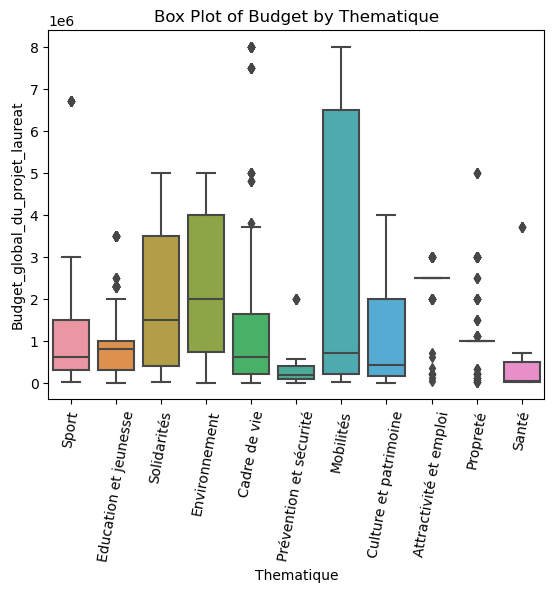

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Thematique', y='Budget_global_du_projet_laureat', data=Budget_Participatifv)
plt.title('Box Plot of Budget by Thematique')
plt.xticks(rotation=80)  # Rotate x labels if they are too long
plt.show()


<span style="color: blue; font-size: 20px;">**Construisez un classificateur d'arbre de décision pour prédire l'"Avancement du projet" en fonction des caractéristiques données**.</span>

In [166]:
#import the necessary libraries for decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [168]:
# Assuming your DataFrame is named df
df = Budget_Participatifv
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Thematique', "Type de financement de l'opération", "Arrondissement de l'opération", 'Arrondissement du projet lauréat', "Quartier de l'opération", 'Opération en Quartier Populaire', 'Projet en Quartier populaire'])

# Define features and target variable
X = df_encoded[['Budget_global_du_projet_laureat'] + [col for col in df_encoded.columns if col.startswith(('Thématique_', "Type de financement de l'opération_", "Arrondissement de l'opération_", 'Arrondissement du projet lauréat_', "Quartier de l'opération_", 'Opération en Quartier Populaire_', 'Projet en Quartier populaire_'))]]
y = df['Avancement du projet']


In [170]:
#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [171]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [172]:
#make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8518781006378455
Classification Report:
                precision    recall  f1-score   support

(non démarré)       0.34      0.42      0.38        24
    ABANDONNÉ       0.17      0.20      0.18        15
       ETUDES       0.64      0.55      0.59        83
          FIN       0.92      0.91      0.91       822
    LIVRAISON       0.86      0.90      0.88       383
   PROCEDURES       0.64      0.67      0.65        27
      TRAVAUX       0.66      0.65      0.65        57

     accuracy                           0.85      1411
    macro avg       0.61      0.61      0.61      1411
 weighted avg       0.85      0.85      0.85      1411



<span style="font-size: 14px;">**Interprétation** :

**Accuracy: 0.8518781006378455**

Cela signifie que le modèle a correctement prédit l’état d’avancement du projet dans environ 85% des cas. C’est une bonne précision globale.

**Détails par classe**:

- **(non démarré)**: La précision (0.34) et le rappel (0.42) sont faibles, ce qui signifie que le modèle a des difficultés à prédire correctement cette classe.
- **ABANDONNÉ**: La précision (0.17) et le rappel (0.20) sont très faibles, indiquant que le modèle a du mal à identifier correctement les projets abandonnés.
- **ETUDES**: La précision (0.64) et le rappel (0.55) sont modérés, ce qui montre une performance moyenne pour cette classe.
- **FIN**: La précision (0.92) et le rappel (0.91) sont très élevés, ce qui signifie que le modèle est très bon pour prédire les projets terminés.
- **LIVRAISON**: La précision (0.86) et le rappel (0.90) sont également élevés, indiquant une bonne performance pour cette classe.
- **PROCEDURES**: La précision (0.64) et le rappel (0.67) sont modérés.
- **TRAVAUX**: La précision (0.66) et le rappel (0.65)


=> modèle de classification des arbres de décision fonctionne bien pour les classes majoritaires comme “FIN” et “LIVRAISON”, mais a des difficultés avec les classes minoritaires comme “ABANDONNÉ” et “(non démarré)” sont modérés.
</span>
. <span/>

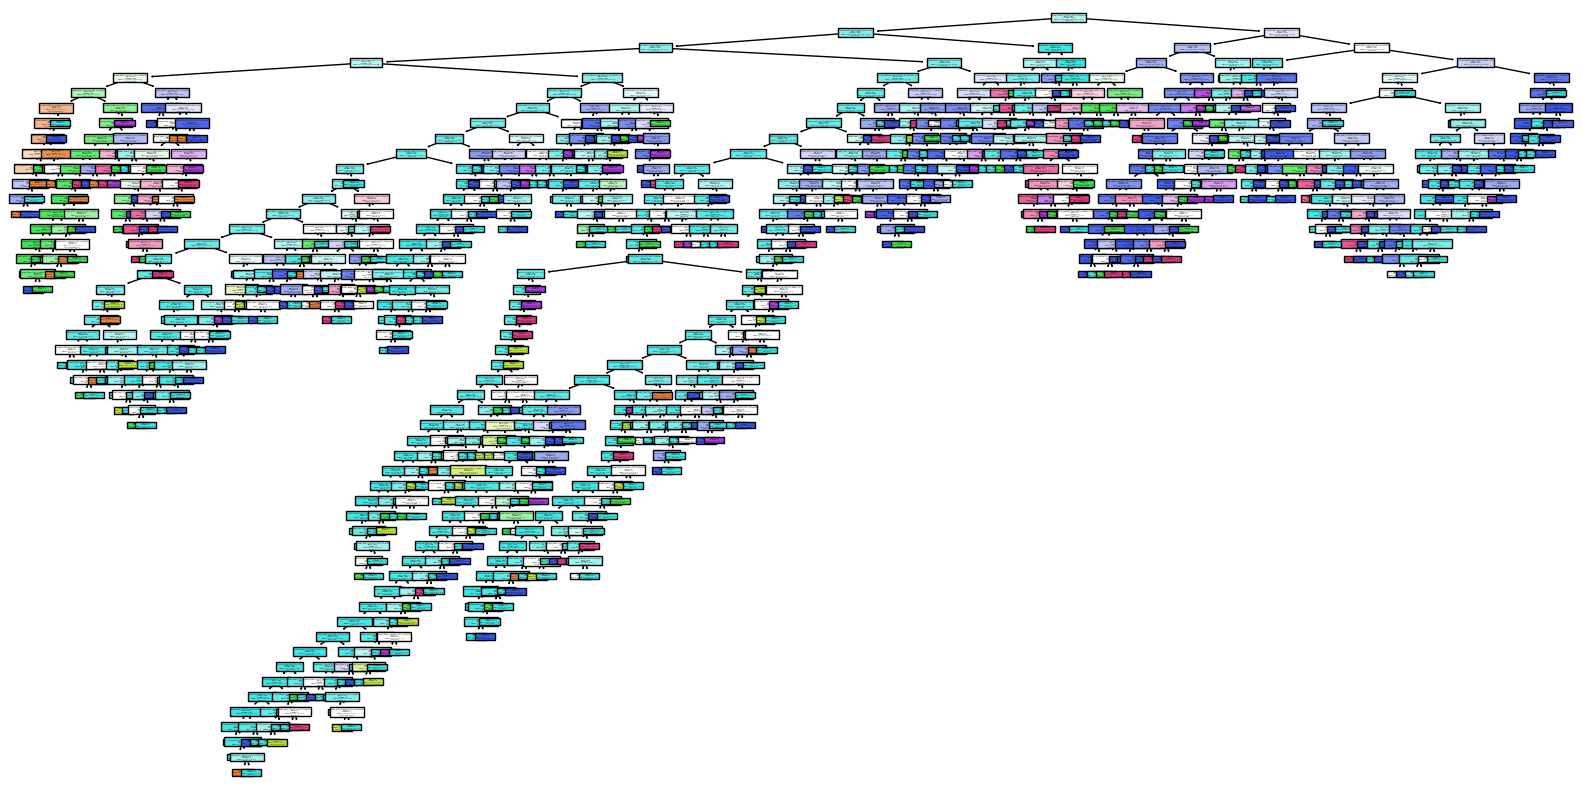

In [174]:
#visualize decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

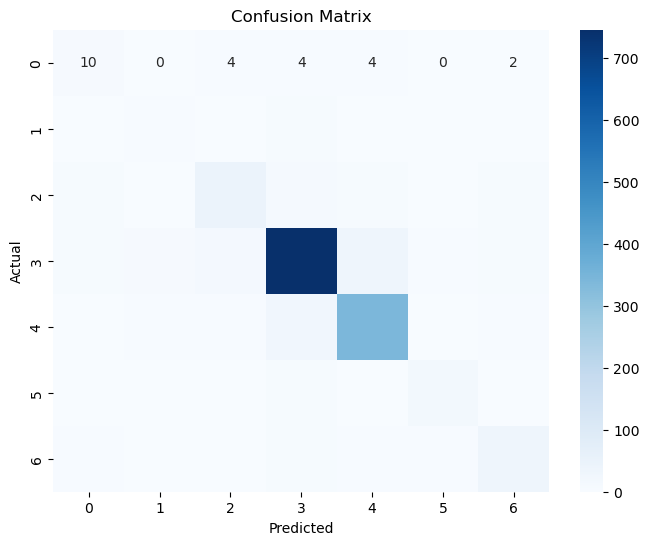

In [175]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [176]:
tree_structure = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Structure:")
print(tree_structure)

Decision Tree Structure:
|--- Budget_global_du_projet_laureat <= 1010000.00
|   |--- Arrondissement du projet lauréat_75004 <= 0.50
|   |   |--- Opération en Quartier Populaire_non <= 0.50
|   |   |   |--- Opération en Quartier Populaire_oui <= 0.50
|   |   |   |   |--- Budget_global_du_projet_laureat <= 435000.00
|   |   |   |   |   |--- Budget_global_du_projet_laureat <= 105000.00
|   |   |   |   |   |   |--- Arrondissement de l'opération_75019 <= 0.50
|   |   |   |   |   |   |   |--- Arrondissement du projet lauréat_75011 <= 0.50
|   |   |   |   |   |   |   |   |--- Budget_global_du_projet_laureat <= 32500.00
|   |   |   |   |   |   |   |   |   |--- Budget_global_du_projet_laureat <= 27500.00
|   |   |   |   |   |   |   |   |   |   |--- Type de financement de l'opération_Subvention <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Type de financement de l'opération_Subvention >  0.50
|   |   |   |   |   